In [7]:
#词云  词云中不要出现太多的词语
import numpy as np
import pandas as pd
import jieba as jb
#文本中本来是没有特征                       词数统计
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_news = pd.read_table('./data/val.txt',header=None,names=['labels','title','url','content'])

In [3]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
labels     5000 non-null object
title      5000 non-null object
url        5000 non-null object
content    5000 non-null object
dtypes: object(4)
memory usage: 156.3+ KB


In [4]:
df_news.head().content

0    经销商　电话　试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1         呼叫热线　４００８－１００－３００　服务邮箱　ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2    ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3    清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4    在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...
Name: content, dtype: object

##### 抽取数据

In [8]:
#进行分类的文本在content当中
contents = []
content = df_news.content
for line in content:
    arr = np.array(jb.lcut(line))
    new_arr = []
    #空文本
    if len(arr) > 0:
    #有没有空字符串，有可能 
        for a in arr:
            #把单个字过滤掉
            if len(a) > 1:
                new_arr.append(a)
        contents.append(new_arr)
contents = np.array(contents)

In [10]:
contents[:10]

array([list(['经销商', '电话', '试驾', '订车', '杭州', '滨江区', '江陵', '保常', '自魄', '白云', '大道北', '广州市', '天河区', '黄埔', '大道', '富力', '盈泰', '大厦', '保常福', '淄博市', '张店区', '山泉', '保常', '保税区', '黄海', '三路', '保玻埃', '纺锨', '复兴路', '保常', '云南', '昆明市', '度假区', '滇池', '保常', '川市', '兴庆区', '丽景', '北街', '保常', '尔滨市', '道外区', '先锋', '矗福', '呈刑', '桂花', '街道', '雀园', '路口', '星沙', '中南', '汽车', '世界', '保常', '信塘城', '经济', '开发区', '盘龙', '汽车城', '矗埃埃福', '保常', '阒莘禺', '区市', '广路', '祈福', '食街', '矗埃埃福', '保常', '新区', '御桥', '保常福', '不帐', '戏适', '邪河', '工业区', '一路', '角江', '南路', '保常', '奚蕉路', '保常', '谐阳区', '北四环', '望京', '保玻福', '平区立', '汤路', '亚北博晟', '汽车', '汇展', '中心', '保埃福', '西省', '南昌市', '青山湖区', '科技', '大道', '耸信', '工业区', '康宁', '车管所', '对面', '保常', '薪宁区', '天元', '中路', '保常', '菏形', '戮济', '技术开发区', '长沈路', '家庄', '北二环', '东路', '河北', '国际', '汽车贸易', '园区', '矗埃埃福', '矗福', '城港路', '广达', '车城', '永兴路', '羰刑', '西区', '北二', '中路', '保常', '啥际星', '保福', '负牛', '挛幕宫', '对面', '矗常', '赡省', '沈阳市', '皇姑区', '鸭绿江', '长客', '总站', '矗福', '新藓区', '罗芳', '立交', '六星', '汽车', '进口', '大众', '保担', '环城路']),
       list(['呼叫', '热

In [22]:
#停用词就是常用的对数据分类没有帮助的词语，在每一种类型的文章中大概率都会出现
#/n C中  =\n
stopwords = pd.read_table('./data/stopwords.txt',sep='/n',header=None,names=['word'],encoding='utf8')

In [26]:
swList = stopwords.word.tolist()

In [27]:
content_clean = []
all_words = []
for line in contents:
    line_clean = []
    for word in line:
        #如果词语不在垃圾词库中，说明它是有用的特征
        if word not in swList:
            #分类
            line_clean.append(word)
            #用来做词云
            all_words.append(word)
    content_clean.append(line_clean)

In [39]:
#计算每种词语的出现次数 all_words   groupby().count()
df_all_words = pd.DataFrame({'all_words':all_words})

In [45]:
words_count = df_all_words.groupby('all_words').all_words.agg({"count":np.size})

In [78]:
#词语需要的是dict类型，不忍dataframe
#all_words 当作key  count 作为 value
word_dict = words_count.sort_values('count',ascending=False).iloc[:100].to_dict()['count']

In [65]:
w = words_count.sort_values('count',ascending=False).reset_index()
w_dict = {x[0]:x[1] for x in w.values}

### 准备词云库

In [111]:
from  wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

- font_path 使用什么字体,字体的路径
- width    图片的宽度
- height   图片的高度
- min_font_size 最小字体的px
- max_font_size 最大字体的px
- background_color  图片的背景颜色
- mask 生产词云的背景轮廓图片

In [167]:
bg = np.array(Image.open('./data/bg.png'))

In [168]:
#进行实例化
wc_model = WordCloud(font_path='./data/simhei.ttf',max_font_size=180,mask=bg,mode='RGBA')

In [169]:
w=' '.join(word_dict.keys())

In [170]:
#把字典数据填入到模型当中
wc_model.fit_words(word_dict)

(-0.5, 3941.5, 3220.5, -0.5)

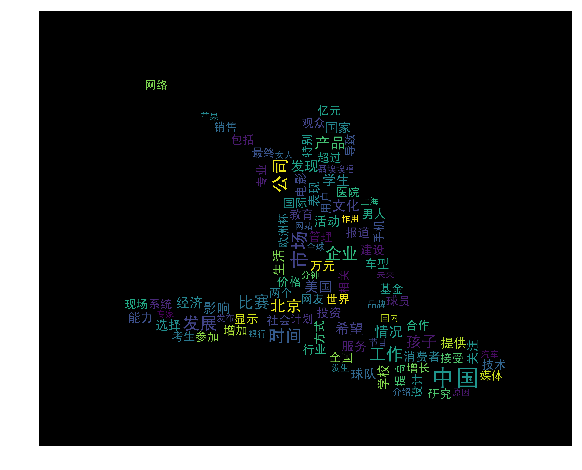

In [171]:
plt.figure(figsize=(12,8))
plt.imshow(wc_model)
plt.axis('off')
#用户画像喜欢用

### LDA主题模型 

In [176]:
from gensim import corpora,models,similarities #语料库，词袋模型
import gensim

In [175]:
content_clean[:2]

[['经销商',
  '电话',
  '试驾',
  '订车',
  '杭州',
  '滨江区',
  '江陵',
  '保常',
  '自魄',
  '白云',
  '大道北',
  '广州市',
  '天河区',
  '黄埔',
  '大道',
  '富力',
  '盈泰',
  '大厦',
  '保常福',
  '淄博市',
  '张店区',
  '山泉',
  '保常',
  '保税区',
  '黄海',
  '三路',
  '保玻埃',
  '纺锨',
  '复兴路',
  '保常',
  '云南',
  '昆明市',
  '度假区',
  '滇池',
  '保常',
  '川市',
  '兴庆区',
  '丽景',
  '北街',
  '保常',
  '尔滨市',
  '道外区',
  '先锋',
  '矗福',
  '呈刑',
  '桂花',
  '街道',
  '雀园',
  '路口',
  '星沙',
  '中南',
  '汽车',
  '世界',
  '保常',
  '信塘城',
  '经济',
  '开发区',
  '盘龙',
  '汽车城',
  '矗埃埃福',
  '保常',
  '阒莘禺',
  '区市',
  '广路',
  '祈福',
  '食街',
  '矗埃埃福',
  '保常',
  '新区',
  '御桥',
  '保常福',
  '不帐',
  '戏适',
  '邪河',
  '工业区',
  '一路',
  '角江',
  '南路',
  '保常',
  '奚蕉路',
  '保常',
  '谐阳区',
  '北四环',
  '望京',
  '保玻福',
  '平区立',
  '汤路',
  '亚北博晟',
  '汽车',
  '汇展',
  '中心',
  '保埃福',
  '西省',
  '南昌市',
  '青山湖区',
  '科技',
  '大道',
  '耸信',
  '工业区',
  '康宁',
  '车管所',
  '对面',
  '保常',
  '薪宁区',
  '天元',
  '中路',
  '保常',
  '菏形',
  '戮济',
  '技术开发区',
  '长沈路',
  '家庄',
  '北二环',
  '东路',
  '河北',
  '国际',
  '汽车贸易',
  '园区',
  '矗埃埃福',

In [181]:
#语料字典
dictionary = corpora.Dictionary(content_clean)

In [183]:
#语料字典  -> 稀疏矩阵
corpus = [dictionary.doc2bow(x) for x in content_clean]

In [184]:
#词袋模型
#corpus  记录行中每个词语出现过了多少次，词语用索引代替了
#id2word  词语本身
#num_topics  类别的数量
lda = models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=10)

In [189]:
#输出主题  25000+
#查看第5个主题(类别)
#topn 显示的特征数量
lda.print_topic(5,topn=20)

'0.005*"女人" + 0.005*"电影" + 0.005*"孩子" + 0.004*"男人" + 0.004*"演员" + 0.004*"爱情" + 0.003*"主演" + 0.003*"生活" + 0.003*"剧组" + 0.003*"剧中" + 0.003*"两人" + 0.003*"角色" + 0.003*"教育" + 0.003*"音乐" + 0.003*"中国" + 0.003*"演出" + 0.003*"工作" + 0.003*"希望" + 0.003*"活动" + 0.003*"导演"'

In [193]:
lda.print_topics(num_topics=5,num_words=10)

[(0,
  '0.005*"比赛" + 0.005*"中国" + 0.004*"球队" + 0.004*"选手" + 0.004*"文化" + 0.004*"男人" + 0.003*"孩子" + 0.003*"希望" + 0.003*"表现" + 0.003*"儿子"'),
 (9,
  '0.003*"乳房" + 0.003*"工作" + 0.002*"含有" + 0.002*"食物" + 0.002*"万元" + 0.002*"赛季" + 0.002*"皮肤" + 0.002*"影响" + 0.002*"发现" + 0.002*"时间"'),
 (4,
  '0.007*"中国" + 0.004*"观众" + 0.003*"美国" + 0.003*"导演" + 0.003*"饰演" + 0.003*"电视剧" + 0.003*"卫视" + 0.003*"生活" + 0.003*"北京" + 0.002*"时间"'),
 (8,
  '0.008*"男人" + 0.008*"考生" + 0.004*"志愿" + 0.004*"女人" + 0.003*"该剧" + 0.002*"专业" + 0.002*"学校" + 0.002*"决赛" + 0.002*"高考" + 0.002*"时间"'),
 (1,
  '0.006*"中国" + 0.003*"比赛" + 0.003*"饰演" + 0.002*"市场" + 0.002*"发展" + 0.002*"观众" + 0.002*"北京" + 0.002*"时间" + 0.002*"美国" + 0.002*"公司"')]

### 分类

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report #分类类型评估

In [197]:
#获取特征
data = []

for i in range(len(content_clean)):
    data.append(' '.join(content_clean[i]))
data = np.array(data)

In [199]:
target = df_news.labels

In [200]:
#进行文本向量化
tfidf = TfidfVectorizer()
sparse_matrix = tfidf.fit_transform(data)

In [202]:
#获取特征
tfidf.get_feature_names()

['一一列举',
 '一一道来',
 '一丁点儿',
 '一万',
 '一万五千',
 '一万元',
 '一万册',
 '一万名',
 '一万多元',
 '一万多名',
 '一万家',
 '一万年',
 '一万次',
 '一丈',
 '一三五',
 '一上午',
 '一上台',
 '一上场',
 '一下子',
 '一不小心',
 '一不愿',
 '一专多能',
 '一世',
 '一丛',
 '一丝',
 '一丝不挂',
 '一丝不苟',
 '一两',
 '一两万',
 '一两个',
 '一两场',
 '一两天',
 '一两岁',
 '一两年',
 '一两成',
 '一两次',
 '一两点',
 '一两间',
 '一个三岁',
 '一个个',
 '一个二十多岁',
 '一个劲地',
 '一个包',
 '一个半',
 '一个多',
 '一个多月',
 '一个头',
 '一个巴掌拍不响',
 '一个愿打',
 '一个愿挨',
 '一个打',
 '一个月',
 '一个样',
 '一个点',
 '一个甲子',
 '一个箭步',
 '一个脚印',
 '一个萝卜一个坑',
 '一个集',
 '一个顶',
 '一中',
 '一中院',
 '一串',
 '一为',
 '一举',
 '一举一动',
 '一举两得',
 '一举多得',
 '一举成名',
 '一乐',
 '一九七五年',
 '一九七四年',
 '一九三',
 '一九四二',
 '一书',
 '一书中',
 '一买',
 '一事',
 '一事无成',
 '一二',
 '一二万',
 '一二三',
 '一二三四',
 '一二十年',
 '一二年',
 '一二百万',
 '一五',
 '一五一十',
 '一亚',
 '一些则',
 '一人',
 '一亿',
 '一亿五千万',
 '一仗',
 '一代',
 '一代人',
 '一代代',
 '一代宗师',
 '一代新人',
 '一以贯之',
 '一件',
 '一件件',
 '一任',
 '一份',
 '一众',
 '一伙',
 '一伙人',
 '一会',
 '一会儿',
 '一会儿站',
 '一传',
 '一位',
 '一低',
 '一住',
 '一体',
 '一体化',
 '一体式',
 '一体机',
 '一例',
 '一侧',
 '一倍',
 '一假',
 '一做题',
 '一

In [203]:
# 是一种数据类型
sparse_matrix

<5000x99885 sparse matrix of type '<class 'numpy.float64'>'
	with 526537 stored elements in Compressed Sparse Row format>

In [204]:
X_train,X_test,y_train,y_test = train_test_split(sparse_matrix,target,test_size=1000)

In [209]:
GB = GaussianNB().fit(X_train.toarray(),y_train)

In [210]:
GB.score(X_train.toarray(),y_train),GB.score(X_test.toarray(),y_test)

ValueError: Found input variables with inconsistent numbers of samples: [4000, 1000]

In [211]:
MNB = MultinomialNB().fit(X_train,y_train)

In [212]:
MNB.score(X_train,y_train),MNB.score(X_test,y_test)

(0.92775, 0.808)

In [217]:
target.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [213]:
BNB = BernoulliNB().fit(X_train,y_train)

In [215]:
BNB.score(X_train,y_train),BNB.score(X_test,y_test)

(0.8745, 0.714)